Эту строку вы можете раскомментировать если будет необходимо.

In [ ]:
#pip install --force-reinstall tensorflow

Импорт библиотек

Задание:  Используя документацию библиотеки, прочитайте о назначении каждого модуля. Зафиксируйте эти сведения в дополнительной текстовой ячейке.

In [ ]:
from keras.layers import Dense # Полносвязный слой, модуль с слоями
from keras.models import Sequential
""" Модели,
The Sequential model- модель, которая очень проста (простой список слоев),
но ограничена стеками слоев с одним входом и одним выходом (как следует из названия).,
Functional API - API, который представляет собой простой в использовании
полнофункциональный API, поддерживающий произвольные архитектуры моделей.
Для большинства людей и в большинстве случаев использования это то, что вы должны использовать.,
Model subclassing - Подклассы моделей, при которых вы реализуете все с нуля самостоятельно.
Используйте это, если у вас есть сложные, готовые варианты использования для исследований"""
from keras.datasets import mnist # Наборы данных, в данном случае набор с цифрами от 0 до 9
from keras import utils # Этот пакет предоставляет утилиты для Keras, такие как модифицированные обратные вызовы, генераторы и т.д.
import numpy as np # Библиотека для работы с матрицами
import matplotlib.pyplot as plt # matplotlib.pyplot представляет собой набор функций, которые заставляют matplotlib работать подобно MATLAB.
%matplotlib inline
# %matplotlib inline устанавливает серверную часть matplotlib в "встроенный" сервер:

Инициализация наборов данных

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Изменение форматов  данных

Задание: Используя дополнительные инструкции, определите исходный формат данных. Попытайтесь определить какие преобразования и для чего производятся в результате выполнения нижеприведённого кода.

**Каждое изображение поступает на вход в виде трехмерной numpy матрицы**

In [ ]:
X_train = X_train.reshape(60000, 784) # Предобработка данных, преобразование в новую форму
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Нормализация изображений
X_test /= 255

Пример выходных данных

In [ ]:
n = 100
print(y_train[n])

5


Преобразуем метки в формат one hot encoding

In [ ]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

Правильный ответ в формате one hot encoding

In [ ]:
print(Y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Создаем нейронную сеть

In [ ]:
model = Sequential()

Добавляем уровни сети

Создаем нейронную сеть:

Задание: Используя документацию, определите основные параметры метода add. Запишите полученные сведения в дополнительной текстовой ячейке. Опишите топологию создаваемой в программе нейронной сети и ее особенности (используемые функции активации, …).

In [ ]:
model.add(Dense(784, input_dim=784, activation="relu")) # Добавление слоя, аргументы слоя Dense: количество входных слоев:784, выходных:784, функция активации: relu
model.add(Dense(200, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))


Компилируем сеть

Задание: Используя справочный материал, поясните значение каждого параметра метода compile

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# loss="categorical_crossentropy", - функция потерь
# optimizer="adam", - функция оптимизации
# metrics=["accuracy"] - метрики, которые будут подсчитываться
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 784)               615440    
                                                                 
 dense_19 (Dense)            (None, 200)               157000    
                                                                 
 dense_20 (Dense)            (None, 10)                2010      
                                                                 
Total params: 774,450
Trainable params: 774,450
Non-trainable params: 0
_________________________________________________________________
None


Обучаем нейронную сеть

Для обучения нейронной сети будем использовать обучающую выборку X_train и правильные ответы для нее Y_train.

Параметр bath_size определяет количество образцов, которые будут одновременно использованы для обучения сети. Этот параметр оказывает влияние на алгоритм обучения.

Параметр epochs отвечает за число эпох обучения.

Параметр validation_split отвечает за долю первоначальных исходных данных, которые пойдут для тестирования обученной сети. Остальная часть исходных данных пойдет для обучения сети.

Параметр verbose отвечает за настройку алгоритма обучения сети.

In [ ]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=25, validation_split=0.2, verbose=2)

Epoch 1/25
240/240 - 11s - loss: 0.2670 - accuracy: 0.9228 - val_loss: 0.1248 - val_accuracy: 0.9627 - 11s/epoch - 45ms/step
Epoch 2/25
240/240 - 5s - loss: 0.0966 - accuracy: 0.9705 - val_loss: 0.0939 - val_accuracy: 0.9712 - 5s/epoch - 22ms/step
Epoch 3/25
240/240 - 7s - loss: 0.0584 - accuracy: 0.9830 - val_loss: 0.0830 - val_accuracy: 0.9758 - 7s/epoch - 27ms/step
Epoch 4/25
240/240 - 9s - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0810 - val_accuracy: 0.9737 - 9s/epoch - 39ms/step
Epoch 5/25
240/240 - 5s - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0834 - val_accuracy: 0.9764 - 5s/epoch - 22ms/step
Epoch 6/25
240/240 - 6s - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0812 - val_accuracy: 0.9774 - 6s/epoch - 25ms/step
Epoch 7/25
240/240 - 9s - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0912 - val_accuracy: 0.9761 - 9s/epoch - 40ms/step
Epoch 8/25
240/240 - 6s - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0885 - val_accuracy: 0.9793 - 6s/epoch - 24ms/step
Epoch 9/25
240

Качество работы сети на тестовых данных

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 97.70%


Задание: Используя справочный материал, изучите атрибуты объекта History. Приведите их краткое описание.

In [ ]:
history_dict = history.history # Обратный вызов, который записывает события в History объект.

Для построения графика качества обучения используется библиотека matplotlib

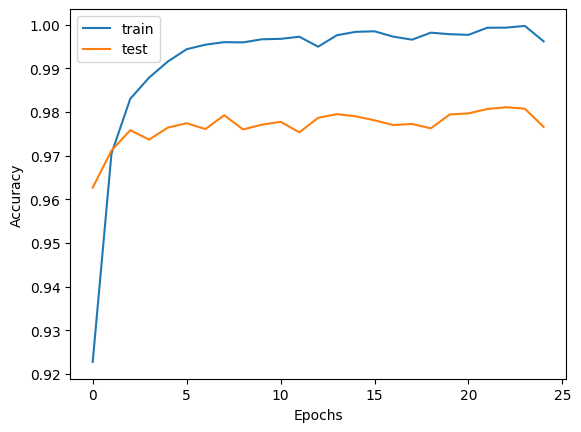

In [ ]:

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Теперь можно распознать рукописную цифру из набора данных, используя обученную сеть:

In [ ]:
n_rec = 488

In [ ]:
x = X_test[n_rec]
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 64ms/step


In [ ]:
print(prediction)

[[7.2617048e-08 5.2404973e-11 2.9430833e-09 2.7387488e-09 1.3431650e-08
  4.4844762e-12 1.6969310e-13 3.9625718e-04 6.6711276e-12 9.9960369e-01]]


In [ ]:
prediction = np.argmax(prediction)
print(prediction)

9


In [ ]:
print(y_test[n_rec])

9


Используя графический редактор paint создайте изображение рукописной цифры. Используйте базовый инструмент «Карандаш». Размер изображения должен быть 28 на 28 пикселей или близкий к этому, поскольку при преобразовании изображение сильно искажается.
Сохраните изображение в формате jpeg и загрузите на свой google-диск.


Подключение google-диска

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Перейдите по ссылке, выберите свой аккаунт google и нажмите «разрешить». Далее следуйте инструкциям. Скопируйте код, перейдите в приложение и вставьте его в нужное поле:

Проверка google-диска ...

In [ ]:
!ls "/gdrive/My Drive/1"

1.jpeg	2.jpeg	3.jpeg	8.jpeg	9.jpeg


Установка библиотек для обработки изображения

In [ ]:
!pip install opencv-python
!pip install scipy


Импорт библиотек для обработки изображения.  Загрузка и обработка изображения с google-диска

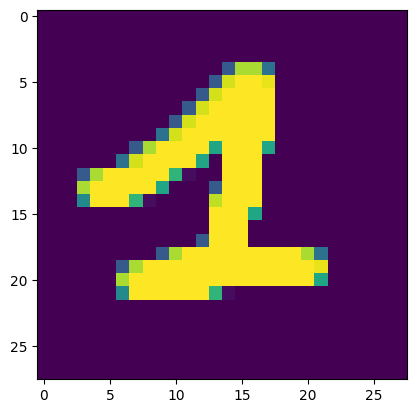

In [ ]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
img=cv2.imread("/gdrive/My Drive/1/1.jpeg", cv2.IMREAD_UNCHANGED) # Чтение изображения
resolution = (28, 28) # Объявление  размера изображения
img = cv2.resize(img, resolution) # Преобразование к нужному размеру
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #  метод используется для преобразования изображения из одного цветового пространства в другое.
img_data = (255.0-img.reshape(-1))/255 # Приведение к нормализованному виду
plt.imshow(img_data.reshape(28,28)) # Преобразование к нужному размеру


Задание: Поясните, какого рода преобразования изображения были произведены, для чего

In [ ]:
x=np.expand_dims(img_data,axis=0)

Используя обученную сеть, пробуем распознать вновь созданное изображение

In [ ]:
prediction = model.predict(x)
print(prediction)

1/1 [==============================] - 0s 22ms/step
[[2.0078834e-07 9.8276502e-01 1.7164672e-02 2.6580253e-07 1.9856939e-06
  5.9324932e-09 2.7614984e-05 2.0214733e-05 2.0052274e-05 2.1075561e-12]]


Оцените результат

In [ ]:
prediction = np.argmax(prediction)
print(prediction)


1
